# implementing decision tree in iris dataset

reading the data

In [1]:
import os
import pandas as pd
import seaborn as sn
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

In [2]:
iris=datasets.load_iris()
Data_frame=pd.DataFrame(iris.data, columns=iris.feature_names)

# EDA

In [3]:
Data_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
Data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
Data_frame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
Data_frame.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

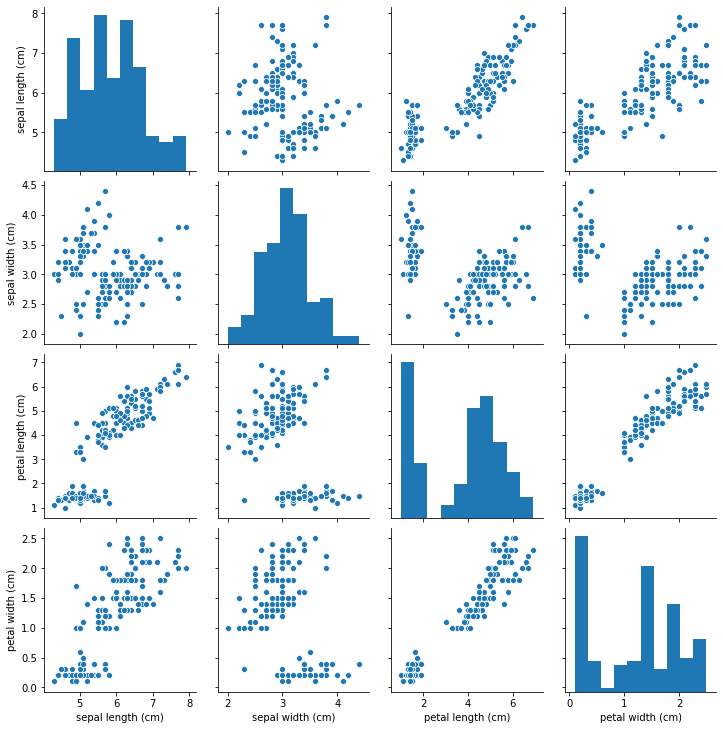

In [7]:
sn.pairplot(Data_frame)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208959F7088>,
      dtype=object)

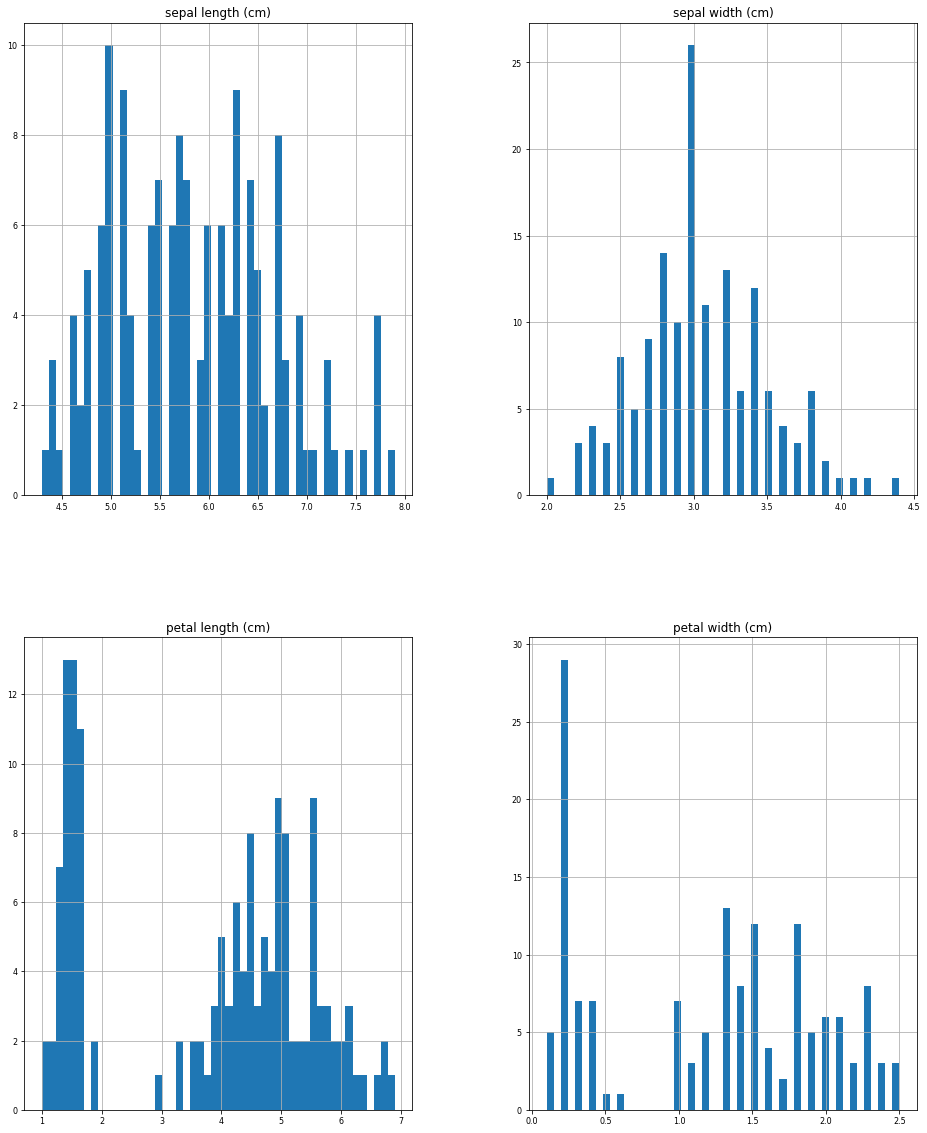

In [8]:
Data_frame.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Data preparation

In [9]:
X=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

# model

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [12]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
max_d=0
for i in range(1,100,1):
    dt=DecisionTreeClassifier(max_depth=i,random_state=0)
    dt.fit(X_train,y_train)
    y_pred=dt.predict(X_test)
    x=metrics.accuracy_score(y_test,y_pred)
    print(x)
    if x>max_d:
        max_d=i

0.5789473684210527
0.8947368421052632
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105

we observe that the accuracy of the classifier doesnt go beyond 0.97 . so lets use depth 4 and try plotting the solution

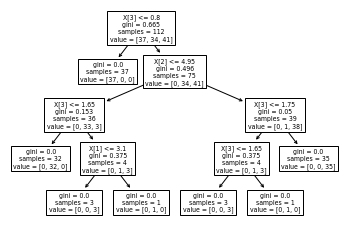

In [13]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 4, random_state = 0)
clf.fit(X_train, y_train)
clf.predict(X_test)
tree.plot_tree(clf);

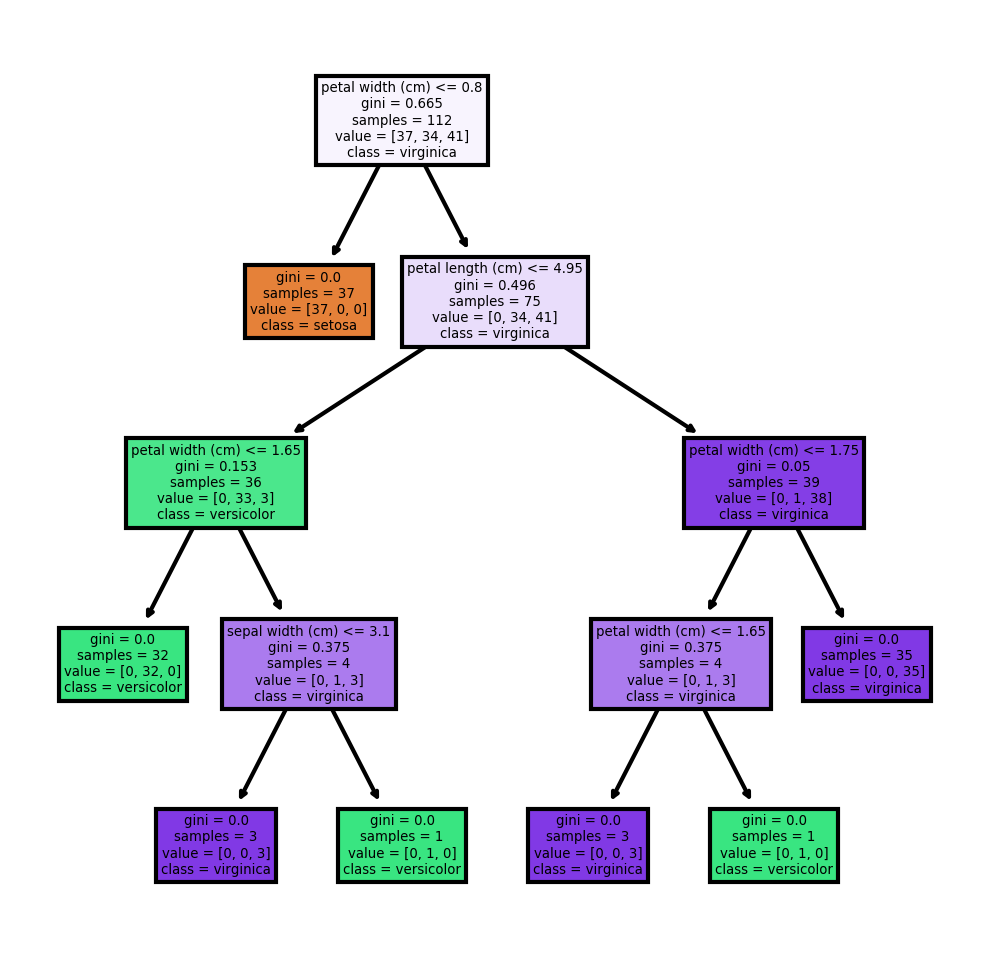

In [14]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);